In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score

class PerceptronParalelo():
    def __init__(self, epochs=100, n=3, error=0.1):
        self.epochs =epochs
        self.n= n
        self.error=error

    def fit(self,X,y):
        rows = X.shape[0]
        dim = X.shape[1] + 1            
        ext = np.ones((rows, 1))
        eXtr = np.hstack((X, ext))
        self.w = np.copy(np.random.uniform(low = 0, high = 1, size = dim))        
        ws = np.copy(self.w)
        h = accuracy_score(y, self.predict(X))
        hs = h
        e=0.01
        m=1
        yi=0.05
        
        #recorrer epocas
        for _ in range(self.epochs):
            suma_predicciones=0
        #recorrer eperceptrones
            for _ in range(self.n):
                self.w=np.copy(np.random.uniform(low=0,high=1, size=dim))
                y_pre=self.predict(X)
                ord=np.random.choice(a=range(rows),size=rows, replace=False)
                chng=0
                for o in ord:
                    if sp[o]>y[o]+self.error:
                        n=0
                        alpha=self.w
                        if sp[o]>y[o]+self.error and alpha*eXtr>=0:
                            z=-eXtr
                        elif sp[o]<y[o]-self.error and alpha*eXtr<0:
                            z=eXtr
                        elif sp[o]>=y[o]+self.error and 0<=alpha*eXtr<yi:
                            z=m*(eXtr)
                        elif sp[o]>=y[o]-self.error and -yi<alpha*eXtr<0:
                            z=m*(-eXtr)
                        else:
                            z=0
                        self.w=self.w+self.w+(1/(4*(_)**0.5))
                    if abs(sp[o]-y[o])<=self.error:
                        pass
                suma_predicciones*=y_pre
                sp  = y_pre
            sp= self.squaching(suma_predicciones)
            h=accuracy_score(y,sp)
            print("Accuracy",h)

    def predict(self, X):
        rows = X.shape[0]
        ext = np.ones((rows, 1))
        eX = np.hstack((X, ext))
        y_hat = np.zeros(rows)

        for i, x in enumerate(eX):
            y_hat[i] = 1 if np.dot(x, self.w) >= 0 else -1

        return y_hat
        
    
            
    def score(self,X,y):
        return accuracy_score(y, self.predict(X))
    
    def squaching(self, p):
        result = np.where(p<0,-1,p)
        result= np.where(p>=0,result)
        return result

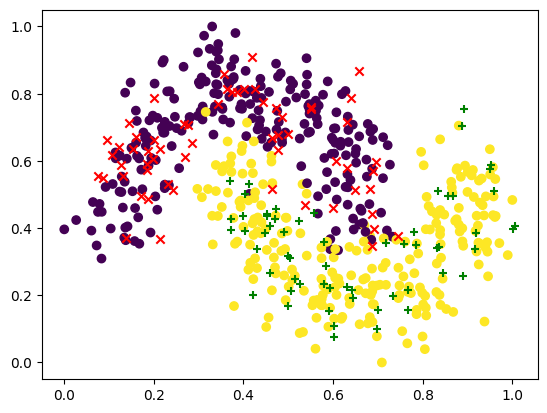

In [3]:
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=600, noise=0.20)

#división del conjunto de datos 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y)

#escalamiento del conjunto de datos
escalador = MinMaxScaler()
X_tr = escalador.fit_transform(X_tr)
X_te = escalador.transform(X_te)

#union de conjuntos de datos escalados entrenamiento y prueba (para graficar)
X_t = np.vstack((X_tr,X_te))
y_t = np.vstack((y_tr.reshape(-1,1),y_te.reshape(-1,1)))

#grafica del conjunto de datos escalados y dividos
plt.scatter(X_tr[:,0], X_tr[:,1], c = y_tr)
plt.scatter(X_te[y_te == 0,0], X_te[y_te == 0,1], marker='x', c = 'red')
plt.scatter(X_te[y_te == 1,0], X_te[y_te == 1,1], marker='+', c = 'green')
plt.show()

In [4]:
ppa = PerceptronParalelo(epochs=100, n=3, error=0.1)
ppa.fit(X_tr, y_tr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()